# Kielipankki's introduction to data analysis

Welcome to this Notebook! It's divided into cells, which are kind of like extremely advanced Excel cells. They contain either formatted text (like this one), or code in the Python programming language which can be run with the results displayed inline.

This is a text cell, but next we'll have a code cell:

In [1]:
print("I'm a code cell!") # And I'm a comment, so I will not show up in the output

I'm a code cell!


If you want to run the code in a code cell, you can hit Control + enter in the cell. You can also run cells from the menu at the top, under "Cell". There you can also change cell type. You can insert new cells under "Insert", or with keyboard shortcuts you can learn about there.

Now for some programming magic stuff..

In [2]:
# These import statements bring in additional modules that we're going to use
import Vrt
import datetime
import matplotlib.pyplot as plt
import pandas
import numpy as np

# This is a special directive to make plots show up in the Notebook
%matplotlib notebook


If the earlier data downloading exercise has been completed successfully, you should have a `.vrt` file, or several, available for reading. Using some prepared code we can read in the VRT data into a nice Python data structure. The Vrt library is not a real library, but just some data ingestion code we wrote to accomplish this for this Notebook.

In [3]:
# If you have a different file, change the name here!
vrt_filename = "M.vrt"
vrt = Vrt.VrtReader(vrt_filename)
# Now the variable "vrt" is of the type "VrtReader" and we can use some fields and functions special to it.
# For example, there's an "info" function that gives a helpful textual summary of its features.
print(vrt.info())


Document contains
    2,324 texts
    74,108 sentences
    847,135 tokens
Text attributes are
    dateto
    id
    datetime_content_modified
    datetime_published
    departments
    timeto
    publisher
    datefrom
    url
    timefrom
    main_department
    datetime_json_modified
Sentence attributes are
    paragraph_type
    type
    id
Token fields are
    word
    ref
    lemma
    lemmacomp
    pos
    msd
    dephead
    deprel
    lex/



In [4]:
# VrtReader has a field called "texts", which is a list of texts, and each text has a "date".
# We can define a list of dates, and find the minimum (earliest) and maximum (latest) dates like this:
dates = [text.date for text in vrt.texts]
min_date = min(dates)
max_date = max(dates)
# We can convert dates to text and print them
print("The earliest text is from " + str(min_date))
print("The latest text is from " + str(max_date))

The earliest text is from 2018-12-31
The latest text is from 2019-04-23


If we would like to plot the data over time, we need to divide it into time segments, for example monthly segments.

In [5]:
def increment_month(date): return (date.replace(day=1) + datetime.timedelta(days=40)).replace(day=1)

In [6]:
# This will be the X-axis of our graph, a list of dates of the first of every month
daterange = []
date = min_date.replace(day=1) # This is a date representing the first of the month of the earliest date
while date <= max_date:
    daterange.append(date)
    date = increment_month(date)

In [7]:
counts = [len(list(filter(lambda t: t.date.year == x.year and t.date.month == x.month, vrt.texts))) for x in daterange]

<IPython.core.display.Javascript object>


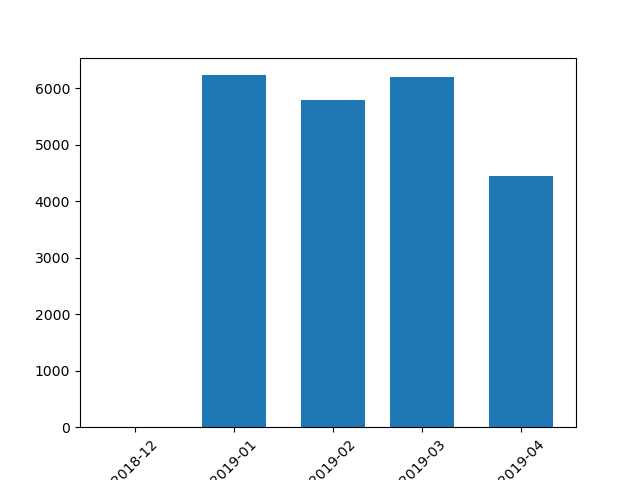

In [18]:
plt.xticks(rotation="45")
plt.bar(daterange, counts, width=20)
plt.show()

In [9]:
def gini(instances):
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    counts = {}
    for instance in instances:
        counts[instance] = counts.get(instance, 0) + 1
    array = np.array(sorted(counts.values()))
    index = np.arange(1,array.shape[0]+1)
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [10]:
daterange

[datetime.date(2018, 12, 1),
 datetime.date(2019, 1, 1),
 datetime.date(2019, 2, 1),
 datetime.date(2019, 3, 1),
 datetime.date(2019, 4, 1)]

In [11]:
verb_tokens = [token for token in vrt.texts[0].tokens() if vrt.token_field_is_value(token, "pos", "V")]

In [12]:
verb_lemmas = vrt.map_tokens_to_field(verb_tokens, "lemma")

In [13]:
gini(verb_lemmas)

0.4143664782174925

In [14]:
def text_to_verb_gini_index(vrt, text):
    verb_tokens = [token for token in text.tokens() if vrt.token_field_is_value(token, "pos", "V")]
    verb_lemmas = vrt.map_tokens_to_field(verb_tokens, "lemma")
    return gini(verb_lemmas)

In [15]:
for text in vrt.texts[:10]: print(text_to_verb_gini_index(vrt, text))

0.4143664782174925
0.4442857142857143
0.4084934277047523
0.3296296296296296
0.40625
0.41055555555555556
0.4184852374839538
0.08333333333333333
0.4163214581607291
0.47898989898989897


In [16]:
vrt.map_tokens_to_field([token for token in vrt.texts[7].tokens() if True or vrt.token_field_is_value(token, "pos", "V")], "word")

['2',
 ':',
 '20',
 'Eeli',
 'Tolvanen',
 '-',
 '29',
 'Anton',
 'Lundell',
 '-',
 '24',
 'Kaapo',
 'Kakko',
 '7',
 'Urho',
 'Vaakanainen',
 '-',
 '2',
 'Oskari',
 'Laaksonen',
 '19.51',
 '1-0',
 'Jason',
 'Robertson',
 '(',
 'Joel',
 'Farabee',
 ')',
 '31.40',
 '2-0',
 'Tyler',
 'Madden',
 '(',
 'Josh',
 'Norris',
 ')',
 '36.42',
 '3-0',
 'Ryan',
 'Poehling',
 '(',
 'Phil',
 'Kemp',
 ')',
 '42.02',
 '4-0',
 'Tyler',
 'Madden',
 '(',
 'Josh',
 'Norris',
 ')',
 '53.16',
 '4-1',
 'Jesse',
 'Ylönen',
 '(',
 'Urho',
 'Vaakanainen',
 ',',
 'Aarne',
 'Talvitie',
 ')',
 '3',
 ':',
 '25',
 'Aarne',
 'Talvitie',
 '-',
 '22',
 'Santeri',
 'Virtanen',
 '-',
 '27',
 'Jesse',
 'Ylönen',
 '3',
 'Toni',
 'Utunen',
 '-',
 '21',
 'Otto',
 'Latvala',
 '**',
 'Yhdysvallat-Suomi',
 '4-1',
 '(',
 '1-0',
 ',',
 '2-0',
 ',',
 '1-1',
 ')',
 '**',
 '4',
 ':',
 '28',
 'Sami',
 'Moilanen',
 '-',
 '12',
 'Samuli',
 'Vainionpää',
 '-',
 '13',
 'Valtteri',
 'Puustinen',
 '36',
 'Anttoni',
 'Honka',
 'Katso',
 'suor

In [17]:
vrt.texts[7].attribs

{'datetime_content_modified': '2019-01-01T07:57:18+0200',
 'datetime_json_modified': '2019-01-01T07:57:19+0200',
 'datetime_published': '2019-01-01T05:00:05+0200',
 'datefrom': '20190101',
 'dateto': '20190101',
 'departments': '|',
 'id': '3-10577595',
 'publisher': 'Yle Urheilu',
 'timefrom': '050005',
 'timeto': '050005',
 'url': 'https://yle.fi/urheilu/3-10577595'}